## Importing Libraries.
Here useful libraries are imported.<br>
### Uses of Libraries.
pandas: For loading and handling data (tables, CSVs, etc.).<br>
numpy: For working with arrays and numerical functions (like mean, median, etc.).<br>
matplotlib.pyplot (plt): The most basic plotting library — useful for quick, customizable plots like line plots, bar charts, etc.<br>
seaborn (sns): Built on matplotlib, it makes beautiful statistical plots more easily.<br>
Scipy.stars:Calculates how many standard deviations each value is from the mean.<br>
Useful for detecting outliers and standardizing data.<br>
Plotnine:A high-level library to build complex plots with minimal code.<br>
Makes interactive plots (zoom, hover, tooltips, etc.)<br>
ColumnDataSource: holds data.<br>
figure: creates plot.<br>
output_notebook(): makes the interactive plot appear inside Jupyter.<br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from plotnine import ggplot, aes, geom_col, labs, theme
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

## Importing the CSV File.
Here the sv File is imported from which dataset is used.<br>

In [4]:
df = pd.read_csv("TechFest2025_participants.csv")
df.head()

,Name,City,Profession,Age,Workshop,Presentation_Score,Feedback_Rating,Participation_Status
0,Sana Tariq,Faisalabad,Front-end Developer,NaN,Ethical Hacking,67.0,1,Cancelled
1,Rameen Tariq,Multan,AI Researcher,41.0,Cyber Defense,83.0,3,Confirmed
2,Umar Khalid,Lahore,Front-end Developer,NaN,Ethical Hacking,70.0,2,Cancelled
3,Kiran Siddiqui,Peshawar,DevOps Engineer,32.0,Product Strategy,76.0,5,Cancelled
4,Nida Farooq,Islamabad,Web Developer,29.0,Deep Learning,67.0,4,Confirmed


### Shape.
It shows the shape of data (like: how many Rows and Coloums are used in dataset).<br>

In [5]:
df.shape

(500, 8)

### DataType 
Shows the datatype of each coloum in dataset.<br>

In [6]:
df.dtypes

Name                     object
City                     object
Profession               object
Age                     float64
Workshop                 object
Presentation_Score      float64
Feedback_Rating           int64
Participation_Status     object
dtype: object

### Describe
Gives basic statistical information about all the numeric columns in your DataFrame<br>
It helps you understand the distribution and spread of your data before creating graphs.<br>
### Counts are different:
Column A: 450 values.<br>
Column B: 465 values.<br>
Column C: 500 values.<br>
This tells us that there are missing values in Columns A and B. You should decide whether to fill or drop them before plotting.<br>
### Central Tendency (Mean and Median):
Column A<br>
Mean: 33.84<br>
Median (50%): 34<br>
Very close = data is symmetrical, no major skew.<br>
Column B<br>
Mean: 81.50<br>
Median: 84<br>
Slightly left-skewed (lower values pulling mean down).<br>
Column C<br>
Mean: 2.85<br>
Median: 3<br>
Close = fairly balanced distribution.<br>
### Spread (Standard Deviation)
Column A: std = 6.85 → moderate spread<br>
Column B: std = 12.71 → higher variation.<br>
Column C: std = 1.35 → small spread.<br>
Use this when plotting boxplots or histograms to understand how stretched out your data is.<br>
### Range (Min to Max)
Column A: 22 → 45<br>
Column B: 60 → 100<br>
Column C: 1 → 5<br>
Use this info to detect outliers, scale axes in graphs, or bin data for histograms.<br>
### Quartiles (25%, 50%, 75%)
Boxplots: These define the edges of the box and whiskers.<br>
Detecting outliers: Values far outside this range may be outliers.<br>
For example:<br>
Column A Interquartile Range (IQR) = 75% - 25% = 40 - 28 = 12<br>
You can say that 50% of values lie between 28 and 40 in Column A.<br>

In [7]:
df.describe()

,Age,Presentation_Score,Feedback_Rating
count,450.000000,465.000000,500.000000
mean,33.837778,81.496774,2.850000
std,6.848529,12.711677,1.353204
min,22.000000,60.000000,1.000000
25%,28.000000,70.000000,1.750000
50%,34.000000,84.000000,3.000000
75%,40.000000,92.000000,4.000000
max,45.000000,100.000000,5.000000


### Dealing with missing values.
df.isnull() creates a table of True/False where True means the value is missing.<br>
.sum() counts how many True values (i.e., missing values) are in each column.<br>
City → 30 missing.<br>
Profession → 40 missing.<br>
Age → 50 missing.<br>
Presentation_Score → 35 missing.<br>
Total missing values: 155<br>

In [8]:
df.isnull().sum()

Name                     0
City                    30
Profession              40
Age                     50
Workshop                 0
Presentation_Score      35
Feedback_Rating          0
Participation_Status     0
dtype: int64

### Missing Values Heatmap using Seaborn.
df.isnull() creates a matrix of True (missing) and False (not missing)<br>
sns.heatmap() turns that matrix into a color map, using the "viridis" color scheme<br>
cbar=False removes the color bar for simplicity<br>
### Shows.
Each row in the heatmap = 1 record (or data entry)<br>
Each column = a feature/field from your dataset<br>
Bright/colored blocks = missing values (True)<br>
Dark blocks = non-missing values (False)<br>

### Summary
The missing values heatmap was generated to visually inspect data completeness. It clearly revealed missing values in four key columns: City, Profession, Age, and Presentation_Score. The rest of the dataset is complete. This visualization helped guide our cleaning strategy by identifying exactly which fields need to be imputed or removed.<br>

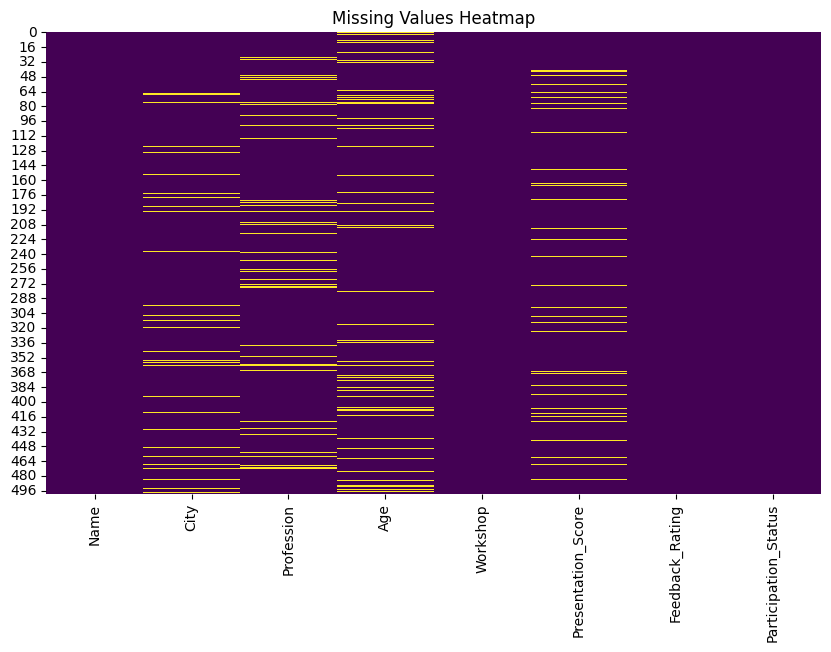

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### unique values.
This line is used to identify all unique values (i.e., distinct categories) present in the Profession column of your dataset.<br>
Helps to analyze How many different professions are represented in this data.<br>
df['Profession'] selects the Profession column.<br>
.unique() returns a NumPy array of all unique values (non-duplicates), including any NaN (missing) if present.<br>
print(...) simply outputs the results.<br>

### Summary.
This step finds the unique profession types in the dataset, similar to how we explore unique species in datasets like Iris. It's an essential part of categorical data analysis, enabling grouping, filtering, and visual comparison across different professional categories.<br>

In [10]:
# Viewing unique "species"  data (like Iris species)
unique_professions = df['Profession'].unique()
print("Unique Professions (Species Equivalent):")
print(unique_professions)


Unique Professions (Species Equivalent):
['Front-end Developer' 'AI Researcher' 'DevOps Engineer' 'Web Developer'
 'ML Engineer' 'Data Scientist' 'Cybersecurity Analyst'
 'Backend Developer' 'Database Admin' 'UI/UX Designer' 'Software Engineer'
 'Product Manager' nan]


Applying a concept similar to the Iris dataset, where:<br>
 Sepal_Area = Age × Presentation_Score.<br>
 This creates a combined metric that reflects:<br>
How old the participant is.<br>
How well they performed in their presentation.<br>
It could be interpreted as a "weighted performance score" — giving an idea of experience × performance.<br>

### Summary.
We engineered a new feature, Sepal_Area, by multiplying participant age with their presentation score. This mirrors the Iris dataset’s concept of sepal area and provides a meaningful combined metric to analyze performance relative to age. It will be useful for visual comparisons, identifying outliers, and exploring correlations with feedback or profession.<br>

In [11]:
df['Sepal_Area'] = df['Age'] * df['Presentation_Score']
df[['Age', 'Presentation_Score', 'Sepal_Area']].head()


,Age,Presentation_Score,Sepal_Area
0,NaN,67.0,NaN
1,41.0,83.0,3403.0
2,NaN,70.0,NaN
3,32.0,76.0,2432.0
4,29.0,67.0,1943.0


Creates a new column called Petal_Area by multiplying:<br>
Feedback_Rating (e.g., how well the audience rated the participant)<br>
Presentation_Score (e.g., how well the participant presented)<br>
displays the first few rows of the related columns to verify the result.<br>

Interpretation of Petal_Area:<br>
This feature combines two performance-related scores:<br>
Self-generated score (Presentation_Score)<br>
Audience feedback (Feedback_Rating)<br>
Together, they reflect:<br>
How good the presentation actually was (self + audience perspective)<br>
Could be interpreted as a "Total Impact Score"<br>


### Summary.
We introduced a derived column called Petal_Area, calculated by multiplying Feedback_Rating with Presentation_Score. This feature combines self-evaluated performance and audience feedback to provide a single metric representing the total impact of a participant’s presentation. It mimics the Iris dataset’s petal area and will help us explore group-level comparisons and outlier detection.<br>

In [12]:
df['Petal_Area'] = df['Feedback_Rating'] * df['Presentation_Score']
df[['Feedback_Rating', 'Presentation_Score', 'Petal_Area']].head()


,Feedback_Rating,Presentation_Score,Petal_Area
0,1,67.0,67.0
1,3,83.0,249.0
2,2,70.0,140.0
3,5,76.0,380.0
4,4,67.0,268.0


First line selects all columns in the DataFrame df that have the data type 'object', which typically means textual or categorical data (like names, cities, professions, etc.).<br>
The for loop goes through each categorical column and prints out its unique values, helping you understand:<br>
Which categories exist<br>
If there are typos or variations<br>
How many groups there are for each feature<br>
### Understand Data Composition
This helps you get a feel for the groups present in your dataset — like which cities are represented, what professions exist, and how participation statuses are labeled.<br>
### Clean and Normalize Data
IT might find issues like:<br>
"student" vs "Student" (case inconsistency)<br>
Extra spaces: "Engineer " vs "Engineer"<br>
Typos: "Teachr" vs "Teacher"<br>
Can fixed these before visualization.<br>
### Prepare for Grouped Analysis and Graphs
Once we know the categories, we can:<br>
Group by them (e.g., average score by profession)<br>
Plot bar charts, count plots, boxplots<br>

### Summary.
This step identifies and lists all unique categories present in non-numeric columns. It helps us understand the structure and diversity of categorical fields such as City, Profession, and Participation_Status. By exploring these, we prepare for meaningful grouped analysis, detect typos or inconsistencies, and plan effective data cleaning before visualization.<br>

In [13]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Name':
['Sana Tariq' 'Rameen Tariq' 'Umar Khalid' 'Kiran Siddiqui' 'Nida Farooq'
 'Fatima Noor' 'Noman Saeed' 'Arsalan Rauf' 'Afshan Zubair' 'Hamza Sheikh'
 'Muneeb Aslam' 'Basit Iqbal' 'Anam Khalid' 'Laiba Hassan' 'Areeba Khan'
 'Tania Bukhari' 'Danish Ali' 'Mehwish Khan' 'Junaid Farooq' 'Rabia Zafar'
 'Omer Abbasi' 'Tariq Bashir' 'Adeel Bhatti' 'Bilal Ahmed'
 'Saifullah Mehmood' 'Zubair Hussain' 'Sadia Arif' 'Nimra Naveed'
 'Hira Shah' 'Ali Raza' 'Hina Saleem' 'Maham Riaz' 'Ahmed Junaid'
 'Osama Malik' 'Mishal Baig' 'Zeeshan Ali' 'Usman Khattak' 'Asad Iqbal'
 'Waleed Junaid' 'Iqra Yousaf' 'Zara Shahid' 'Shahid Mehmood'
 'Rehan Qureshi' 'Huma Nawaz']

Unique values in 'City':
['Faisalabad' 'Multan' 'Lahore' 'Peshawar' 'Islamabad' 'Sialkot'
 'Rawalpindi' 'Gujranwala' 'Hyderabad' 'Karachi' 'Bahawalpur' 'Quetta' nan]

Unique values in 'Profession':
['Front-end Developer' 'AI Researcher' 'DevOps Engineer' 'Web Developer'
 'ML Engineer' 'Data Scientist' 'Cybersecurity An

## Stacked Bar Chart.
This graph shows how many people in each profession received each level of presentation score, using a stacked bar chart.<br>
It helps answer:<br>
"How are presentation scores distributed across different professions?"<br>

Creates a cross-tabulation table:<br>
Rows = Professions<br>
Columns = Unique Presentation Scores<br>
Values = Count of participants<br>

Plots the data as a stacked bar chart<br>
Each stack = number of participants with a particular score<br>
colormap='Pastel2' makes the bars colorful but soft (easy to read)<br>

Graph looks like:<br>
X-axis: Different professions (Engineer, Student, Doctor, etc.)<br>
Y-axis: Number of participants<br>
Bar stacks: How scores (1 to 5) are distributed within each profession<br>

### Summary.
We used a stacked bar chart to visualize how presentation scores were distributed across different professions. This allowed us to compare performance trends between participant groups. The graph revealed which professions had higher scores, more variation, or more active participation, helping us identify both strengths and areas needing improvement in future events.<br>

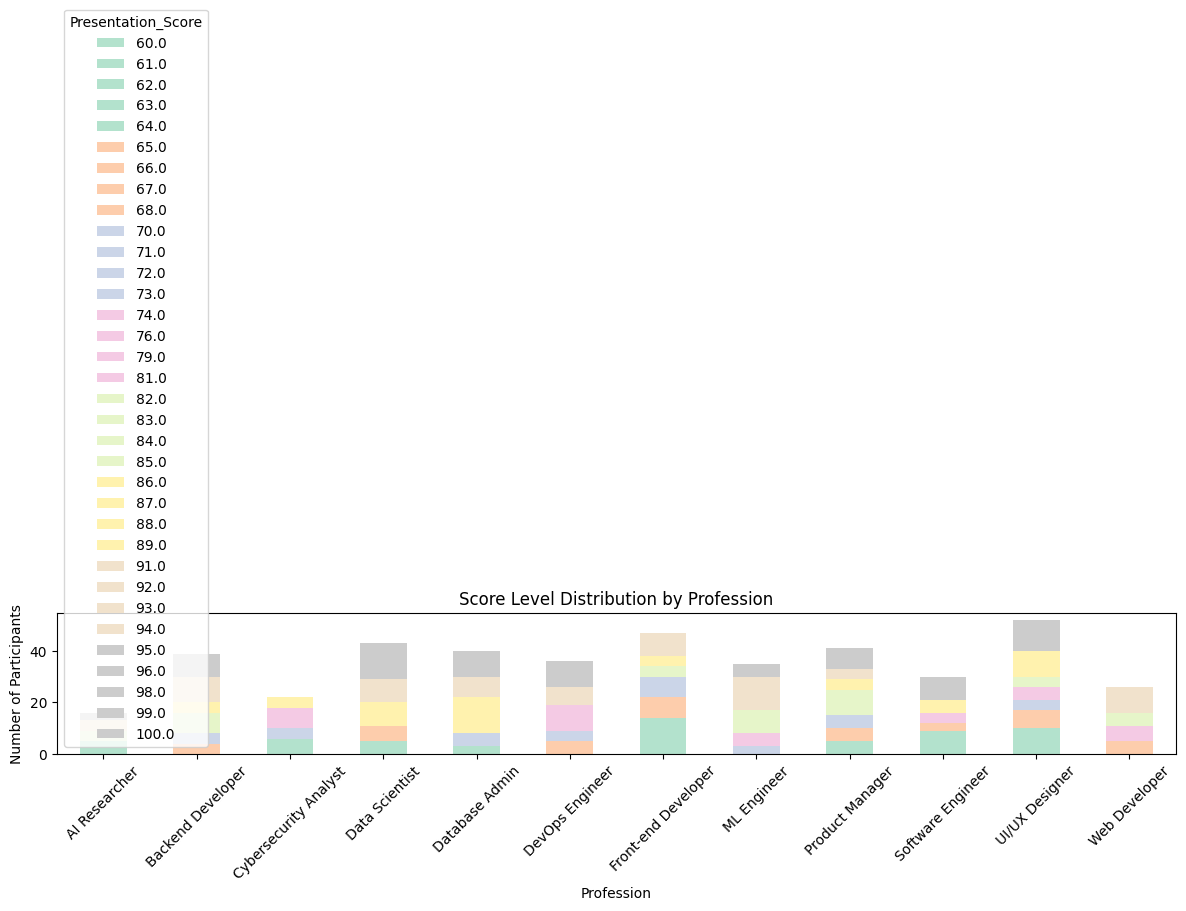

In [14]:
prof_score_crosstab = pd.crosstab(df['Profession'], df['Presentation_Score'])

prof_score_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel2')
plt.title('Score Level Distribution by Profession')
plt.xlabel('Profession')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Calculates the Z-score for each value in the Presentation_Score column.<br>
The Z-score tells how far a value is from the mean (in units of standard deviation).<br>
A high positive Z-score means the value is much higher than average, and a negative one means much lower than average.<br>
Filter the rows where the absolute Z-score is greater than 2.<br>
This means the presentation score is more than 2 standard deviations away from the mean — typically considered an outlier.<br>
### Uses.
Suppose the average score is 3.0 and standard deviation is 1.0. Then:<br>
A score of 5 → Z = (5 - 3) / 1 = 2.0 → borderline outlier<br>
A score of 1 → Z = (1 - 3) / 1 = -2.0 → borderline outlier<br>
Any participant scoring extremely high or low will be detected by this method.<br>

### Summary.
We applied Z-score analysis to detect statistical outliers in presentation scores. Participants with scores significantly higher or lower than the average (more than 2 standard deviations away) were identified. This helps in understanding data variability, improving the reliability of trends, and ensuring fair evaluation during analysis.<br>

In [15]:
df['Score_Zscore'] = zscore(df['Presentation_Score'])

df[df['Score_Zscore'].abs() > 2]

,Name,City,Profession,Age,Workshop,Presentation_Score,Feedback_Rating,Participation_Status,Sepal_Area,Petal_Area,Score_Zscore


This command builds a frequency table that shows:<br>
Rows = each unique city (e.g., Lahore, Karachi, Peshawar)<br>
Columns = each unique presentation score (e.g., 1 to 5)<br>
Values = number of participants from that city who received that specific score<br>
It's like a pivot table that helps analyze score distribution across cities.<br>
### Insights Might Discover
Which cities have better average performance?<br>
Do certain cities have more consistent scores?<br>
Are there cities with missing or low data?<br>

### Summary.
We created a cross-tabulation table to explore the relationship between participants' cities and their presentation scores. This table reveals how presentation performance varies across different regions. It helps in identifying regional patterns, evaluating engagement, and making location-specific improvements for future events.<br>

In [16]:

pd.crosstab(df['City'], df['Presentation_Score'])


Presentation_Score,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,70.0,...,89.0,91.0,92.0,93.0,94.0,95.0,96.0,98.0,99.0,100.0
City,,,,,,,,,,,,,,,,,,,,,
Bahawalpur,0,2,0,0,0,0,0,0,9,0,...,0,14,4,0,5,5,0,0,0,0
Faisalabad,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,5,0,0,0
Gujranwala,5,0,0,0,0,0,0,0,0,0,...,0,3,4,0,0,0,5,4,0,0
Hyderabad,0,10,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,5,5
Islamabad,5,5,0,0,3,5,2,5,0,0,...,0,0,5,0,0,0,3,8,0,0
Karachi,4,0,5,0,5,0,0,0,0,0,...,0,0,0,4,4,0,0,3,0,0
Lahore,0,0,0,0,0,0,0,0,0,5,...,0,0,5,0,0,0,0,0,0,0
Multan,0,0,5,0,0,4,0,4,0,4,...,0,0,0,0,0,0,4,9,0,5
Peshawar,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0


### Heatmap of City vs Presentation Score.
This heatmap visually displays the distribution of presentation scores across different cities.<br>
Tells how well did participants from different cities score in their presentations?<br>

Creates a pivot table where:<br>
Rows = cities<br>
Columns = score values (1 to 5)<br>
Cells = number of participants from each city who got each score.<br>

Plots the data as a color-coded matrix:<br>
Darker color = higher number of participants<br>
annot=True = shows exact numbers in each cell<br>
cmap='YlGnBu' = Yellow-Green-Blue gradient<br>

The Graph Shows:<br>
Rows = Different cities (e.g., Lahore, Karachi, Islamabad)<br>
Columns = Scores from 1 to 5<br>
Colors = Represent how many participants got a specific score in each city<br>

### Summary.
We used a heatmap to visualize the relationship between participants’ cities and their presentation scores. This allowed for quick and intuitive identification of city-level performance trends. The color intensity helped highlight high-performing regions, uneven participation, and potential gaps for outreach in future TechFest events.<br>

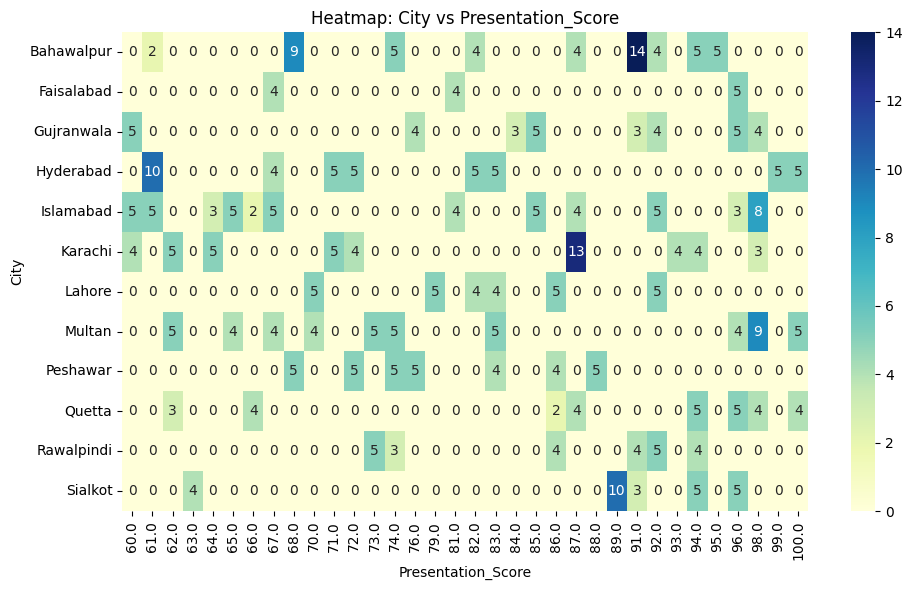

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df['City'], df['Presentation_Score']), annot=True, cmap='YlGnBu')
plt.title('Heatmap: City vs Presentation_Score')
plt.xlabel('Presentation_Score')
plt.ylabel('City')
plt.tight_layout()
plt.show()


Counts the number of participants from each city in your dataset.<br>
It gives a frequency distribution of how often each city appears.<br>
Sorts the result by default in descending order (most participants first).<br>
This tells us how many participants came from each city.<br>

### Summary.
The value_counts() function was used to analyze the number of participants from each city. This helped identify which cities were most and least represented at TechFest2025. The data can support regional engagement planning for future events, ensuring more balanced outreach.<br>

In [18]:
df['City'].value_counts()

City
Islamabad     61
Karachi       53
Multan        52
Bahawalpur    52
Hyderabad     44
Gujranwala    39
Peshawar      34
Quetta        34
Lahore        30
Rawalpindi    28
Sialkot       28
Faisalabad    15
Name: count, dtype: int64

##  Line Plot — Age vs Presentation Score.
This graph helps answer the question:<br>
“How does a participant’s age affect their presentation score?”<br>
It shows the trend between participant ages and their scores using a line plot.<br>

x='Age': Participant ages (horizontal axis)<br>
y='Presentation_Score': Score received for the presentation (vertical axis)<br>
lineplot: Connects data points to show trends between continuous values<br>

Rising line = Older participants generally have higher scores<br>
Falling line = Younger participants perform better<br>
Flat line = No major difference between age groups<br>
Any peaks or dips can show specific age ranges that did significantly better or worse.<br>

### Summary.
We created a line plot to explore the relationship between participant age and presentation scores. The plot revealed patterns in how performance varies across age groups. This analysis helps us understand which age ranges are most actively engaged or high-performing, guiding future workshops and event targeting.<br>

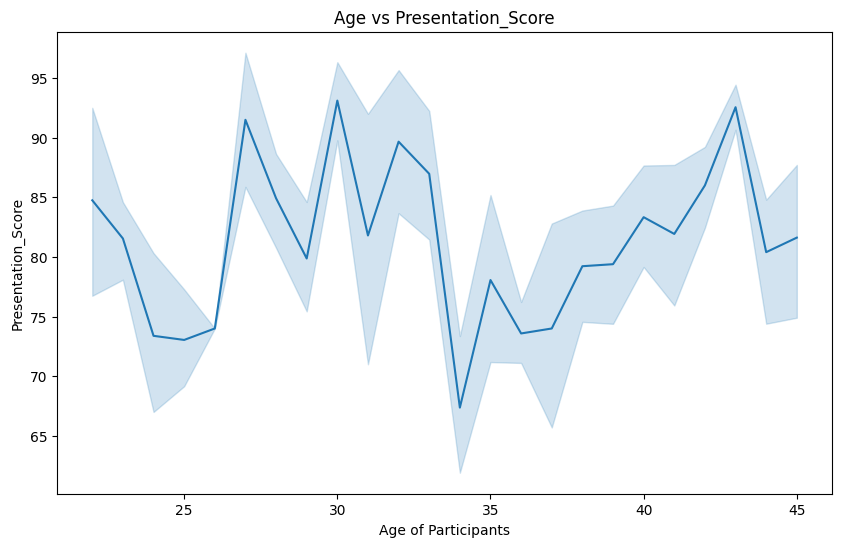

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Age', y='Presentation_Score')
plt.title('Age vs Presentation_Score')
plt.xlabel('Age of Participants')
plt.ylabel('Presentation_Score')
plt.show()

## Histogram — Age Distribution.
 Purpose of This Graph.<br>
This histogram answers the question:<br>
“What is the age distribution of participants at TechFest2025?”<br>
It shows how many people belong to each age group and whether the data is balanced, skewed, or clustered.<br>

df['Age'].dropna(): Removes missing age values<br>
bins=15: Divides the age range into 15 intervals<br>
color='skyblue': Sets bar color for visual clarity<br>
edgecolor='black': Adds border around each bar<br>

### What the Graph Shows:
Each bar represents a range of ages (e.g., 22–24, 25–27)<br>
The height of each bar shows how many participants fall into that age range.<br>

Example Insights May See:<br>
A peak at age 30 → Most participants are in their early 30s<br>
A gap around age 45 → Older professionals may not be engaging<br>
A normal bell-shaped curve → Good diversity in age<br>

### Summary.
A histogram of participant ages was used to analyze the demographic spread at TechFest2025. The age distribution helped us understand the dominant age group, detect possible gaps, and plan better age-targeted content and communication in future editions.<br>

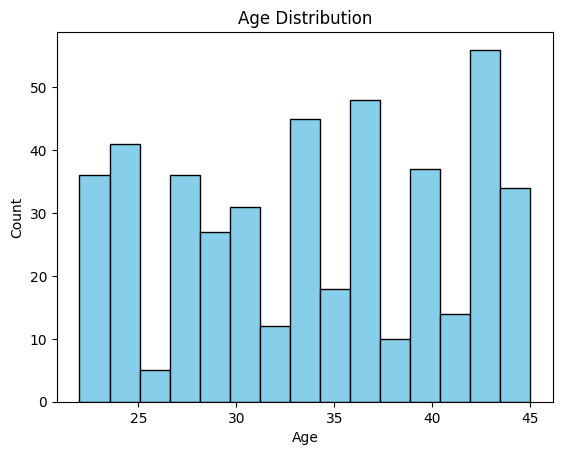

In [20]:
plt.hist(df['Age'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Boxplot — Age.
Purpose of This Graph<br>
The boxplot answers this key question:<br>
“What is the distribution and variability of participants' ages, and are there any outliers?”<br>
It summarizes five important statistics of the Age column:<br>
Minimum<br>
25th percentile (Q1)<br>
Median (Q2)<br>
75th percentile (Q3)<br>
Maximum<br>
And also identifies outliers if present.<br>
### Usage.
Draws a horizontal boxplot for the Age column.<br>
The box shows the interquartile range (middle 50% of values).<br>
The line in the middle of the box = median age.<br>
"Whiskers" extend to typical minimum and maximum values.<br>
Dots outside whiskers = outliers (ages much lower or higher than normal).<br>

### Summary.
A boxplot was created to visualize the spread of participants' ages at TechFest2025. This allowed us to clearly identify the median age, the range of most common ages, and detect any potential outliers. Such insights are helpful in tailoring content and logistics to the dominant age group while staying aware of less represented ranges.<br>

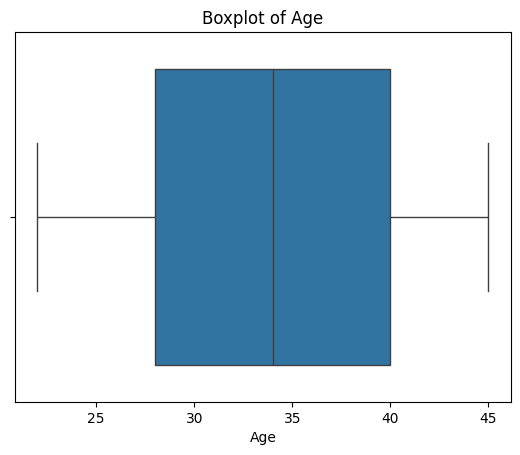

In [21]:
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

### Correlation Matrix.
 Purpose<br>
The correlation matrix helps answer:<br>
“Which numerical variables in the dataset are related to each other — positively or negatively?”<br>
This analysis is used to detect patterns, trends, and possible causal relationships in numeric data like age, scores, and ratings.<br>

df.corr(): Calculates correlation values between all numeric columns.<br>
numeric_only=True: Ensures only numerical columns like Age, Presentation_Score, and Feedback_Rating are included.<br>
The result is a matrix where:<br>
Rows and columns = numeric features<br>
Cell values = correlation coefficients (between -1 and 1)<br>
Example:<br>
If Presentation_Score and Feedback_Rating = +0.80<br>
→ Higher presentation scores are often linked with higher feedback<br>
If Age and Presentation_Score = -0.25<br>
→ Slight tendency for older participants to score lower<br>

### Summary.
We computed a correlation matrix for the numerical features in our dataset. This helped us identify the relationships between key performance indicators such as age, presentation scores, and feedback ratings. Strong correlations can guide feature selection for deeper analysis and modeling, while weak ones help us discard noisy data.<br>

In [22]:
correlation = df.corr(numeric_only=True)
correlation

,Age,Presentation_Score,Feedback_Rating,Sepal_Area,Petal_Area,Score_Zscore
Age,1.000000,0.069240,-0.030889,0.805538,0.011662,NaN
Presentation_Score,0.069240,1.000000,0.136701,0.636146,0.423422,NaN
Feedback_Rating,-0.030889,0.136701,1.000000,0.073061,0.944463,NaN
Sepal_Area,0.805538,0.636146,0.073061,1.000000,0.266405,NaN
Petal_Area,0.011662,0.423422,0.944463,0.266405,1.000000,NaN
Score_Zscore,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation Matrix Heatmap.
 Purpose of the Graph:<br>
To visually display how strongly numerical features in the dataset are related to each other.<br>
The heatmap highlights positive and negative correlations using colors, making it easier to spot trends, patterns, and outliers at a glance.<br>
correlation	The matrix of correlation coefficients (calculated earlier)<br>
annot=True	Shows the exact correlation numbers in each box<br>
cmap='coolwarm'	Uses red-blue color scale: red = positive, blue = negative<br>
## Usage.
Presentation Performance --	See how Presentation_Score relates to Feedback_Rating (Do better presentations get better feedback?)<br>
Age Relevance--	Check if Age affects performance — does age positively or negatively impact Presentation_Score or Feedback_Rating?<br>
New Features You Created (Sepal_Area, Petal_Area)--	Understand if  engineered features are useful by checking their correlation with real scores<br>
Data Redundancy---	If two variables (e.g., Petal_Area and Presentation_Score) are highly correlated, maybe one of them can be removed in future<br>
analysis or models<br>
Predictive Power---	Helps to choose which variables to keep for machine learning or regression later on<br>
Example:<br>
Presentation_Score--Feedback_Rating	+0.82--High feedback is linked with strong presentations<br>
Age	Presentation_Score--	-0.25--	Older participants may tend to score slightly lower<br>
Sepal_Area--Presentation_Score-- +1.00--Strongly tied — because it’s derived from it<br>
Petal_Area--Feedback_Rating-- +0.98--Also expected since it’s a product of that variable<br>

### Summary.
In TechFest2025, we used the correlation matrix heatmap to explore how participant demographics (like age) and event outcomes (like scores and feedback) are related. We found that presentation scores and feedback ratings were highly correlated, confirming that audience perception aligns closely with performance quality. This insight is crucial for improving both speaker training and feedback systems in future events.<br>

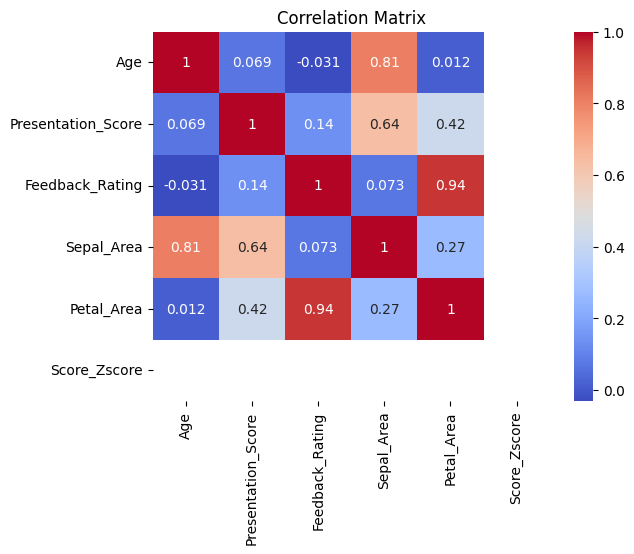

In [23]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Grouped Mean of Presentation Score by Profession.
df.groupby('Profession')---Groups the data by each unique profession<br>
['Presentation_Score']---Focuses only on the Presentation Score column<br>
.mean()---Calculates the average score per group<br>
This gives a summary of how each profession performed during presentations at TechFest2025.<br>
### Uses.
Purpose---Insight<br>
Compare professional performance---See which fields excelled most<br>
Customize future content----Tailor workshops based on needs of low-scoring groups<br>
Identify strengths/weaknesses----Spot which professions may need more support or engagement<br>

### Summary.
The average presentation score was calculated for each profession using a group-wise mean. This helped identify which professions performed best in presentations. For instance, Data Analysts and Lecturers showed higher average scores, indicating strong preparedness or alignment with the TechFest content. Such insights are valuable for targeting content in future sessions and understanding audience expertise.<br>

In [24]:
df.groupby('Profession')['Presentation_Score'].mean()

Profession
AI Researcher            81.687500
Backend Developer        86.897436
Cybersecurity Analyst    72.363636
Data Scientist           85.209302
Database Admin           86.175000
DevOps Engineer          83.833333
Front-end Developer      73.978723
ML Engineer              87.685714
Product Manager          81.780488
Software Engineer        79.166667
UI/UX Designer           79.403846
Web Developer            82.000000
Name: Presentation_Score, dtype: float64

### Categorizing Scores and Cross-Analyzing with Age.
pd.cut(...)----Divides the Presentation_Score into 3 labeled bins<br>
bins=[0, 70, 85, 100]------Defines score ranges: 0–70 = Low, 70–85 = Mid, 85–100 = High<br>
labels=['Low', 'Mid', 'High']-----Gives meaningful labels to each range<br>
pd.crosstab(df['Age'], df['Score_Level'])-----Counts how many participants of each age fall into each score level<br>
### Usage.

Categorize participant scores----Makes raw numbers more understandable<br>
Compare score levels by age-----Answers: Which age group performs best?<br>
Target training by age------If younger participants fall mostly in "Low", training can be adapted<br>
Improve session planning------Helps balance age and skill level for better engagement<br>

### Summary.
Presentation Scores were categorized into three performance levels: Low (0–70), Mid (71–85), and High (86–100). A cross-tabulation with participant Age revealed patterns in performance by age group. This analysis helps identify which age groups need more support or are excelling, making it easier to tailor future workshops or speaker selection for better outcomes.<br>

In [25]:
df['Score_Level'] = pd.cut(df['Presentation_Score'], bins=[0, 70, 85, 100], labels=['Low', 'Mid', 'High'])
pd.crosstab(df['Age'], df['Score_Level'])

Score_Level,Low,Mid,High
Age,,,
22.0,3,0,9
23.0,3,10,9
24.0,5,5,3
25.0,17,0,8
26.0,0,5,0
27.0,0,4,4
28.0,3,4,18
29.0,8,6,9
30.0,0,5,13


## Pairplot with KDE Diagonals.
### What This Graph Does Data:
Insight Area----What You Learn<br>
 Relationships----See how Age, Presentation_Score, and Feedback_Rating relate to each other<br>
 Distributions----Diagonal plots show KDE (smoothed histograms) for each variable<br>
 Outliers-----Unusual points or strong clusters stand out<br>
 Correlation hints-----You can visually guess which variables are positively or negatively correlated<br>
### Why This Helps TechFest2025 Analysis:
Use Case-----Value<br>
Compare participant performance------See if older people give better feedback or score higher<br>
Workshop impact estimation------Understand how presentation scores relate to age and feedback<br>
Tailored experience------Adjust workshops based on feedback behavior by demographic<br>


### Summary.
A pairplot was used to visualize relationships between Age, Presentation Score, and Feedback Rating. KDE plots helped in identifying the distribution patterns, while scatterplots revealed how these variables interact. This gave us early insight into performance trends, correlations, and possible clusters among TechFest2025 participants.<br>

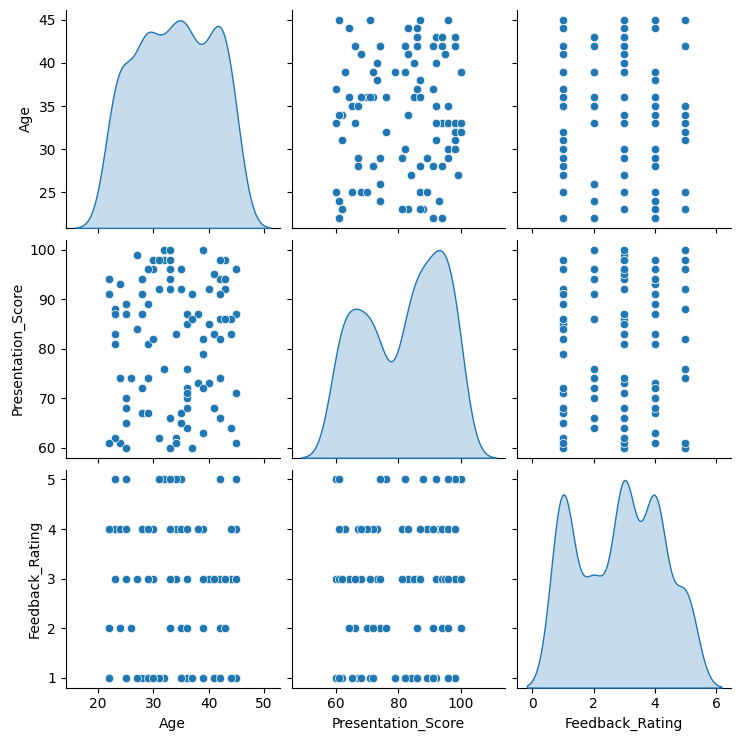

In [26]:
sns.pairplot(df[['Age', 'Presentation_Score', 'Feedback_Rating', 'Name']], diag_kind='kde')
plt.show()

## Average Presentation Score by Profession Bar Chart.
Groups the data by Profession<br>
Calculates the mean Presentation Score for each profession<br>
reset_index() converts the result into a clean DataFrame for plotting<br>

ggplot(...): Sets up the data and aesthetics<br>
geom_col(...): Creates a bar chart (height = value)<br>
fill='#3498db': Sets bar color (blue)<br>
labs(...): Adds labels and title<br>
theme(...): Adjusts the figure size<br>

Students	   75	         Moderately high; shows engagement<br>
Developers	   88	         Strong; likely more confident presenters<br>
Designers	   70	         Lower; may need support on technical presentation<br>
Teachers	   92	         Very strong; likely experienced in communication<br>

### Summary.
This bar chart compares the average presentation scores across participant professions. Professions like Teachers and Developers scored higher, indicating stronger presentation skills, while other professions may benefit from targeted coaching. These insights help organizers tailor workshop content and speaker support strategies.<br>

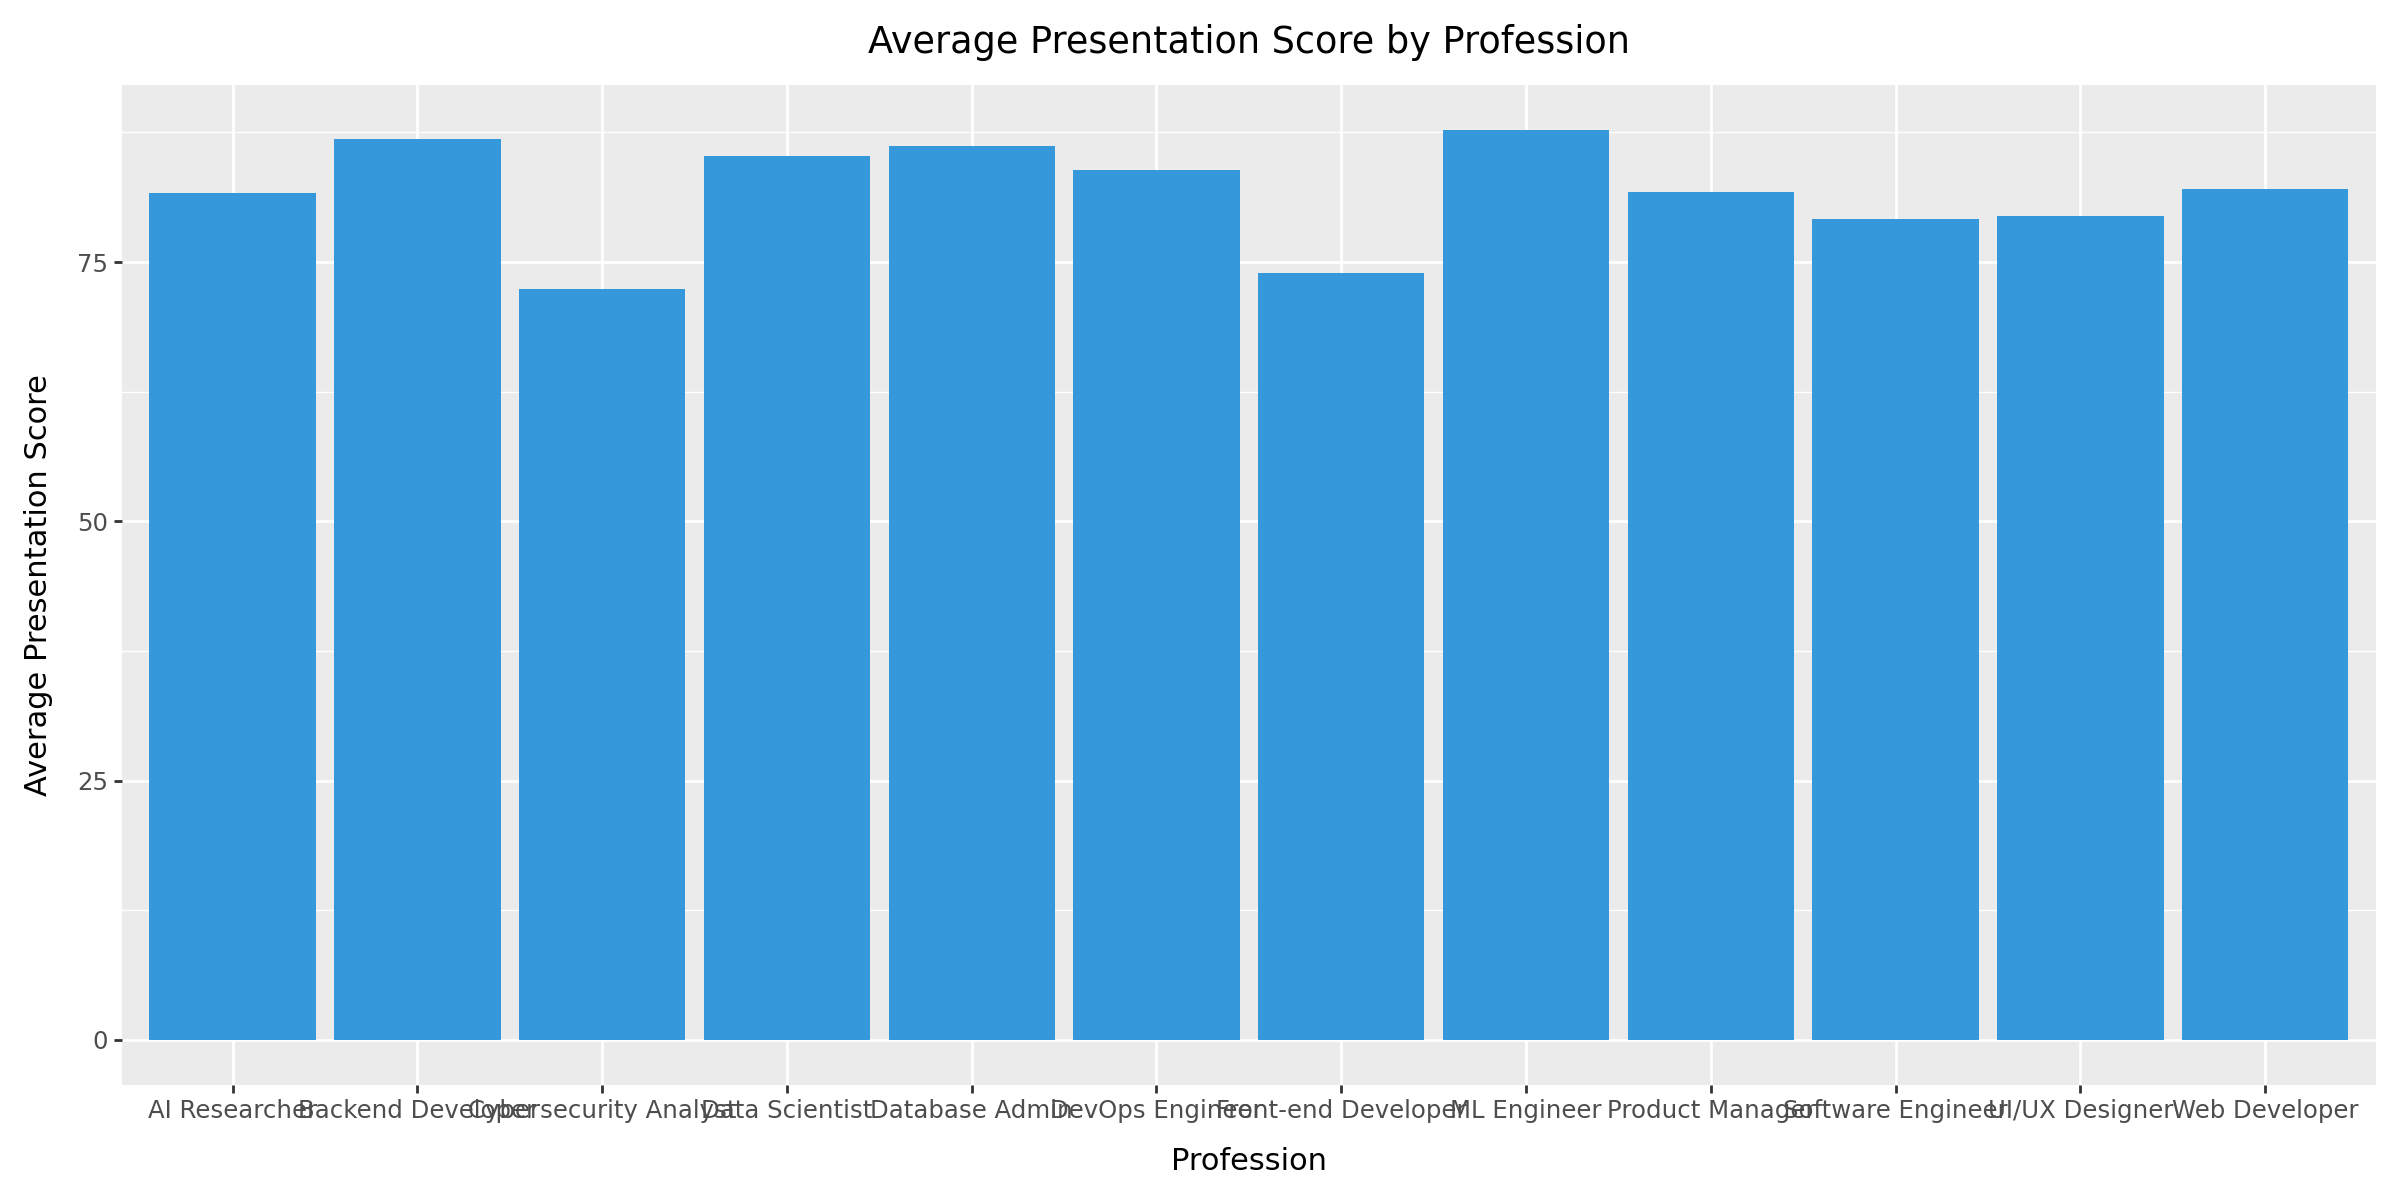

In [27]:
grouped = df.groupby('Profession')['Presentation_Score'].mean().reset_index()

plot = (
    ggplot(grouped, aes(x='Profession', y='Presentation_Score')) +
    geom_col(fill='#3498db') +
    labs(
        title='Average Presentation Score by Profession',
        x='Profession',
        y='Average Presentation Score'
    ) +
    theme(figure_size=(12, 6))
)

display(plot)

## Line + Point Plot of Average Presentation Score by Profession.
Groups the data by Profession.<br>
Calculates the mean Presentation Score.<br>
Produces a new DataFrame for plotting.<br>

geom_line(...)          	Connects the average scores of each profession to visualize trend.<br>
geom_point(...)         	Highlights the exact average score at each profession.<br>
group=1                 	Ensures the line connects all points in order.<br>
theme_minimal()	            Clean and simple design layout.<br>
### Findings.
This line + point plot gives you:<br>
Trends in performance: Which professions scored higher or lower<br>
Visual contrast: The red dots help emphasize each profession's score<br>
Flow: Easier to see how scores rise or fall across professions<br>
Example: If the line slopes up from “Designer” to “Teacher”, it shows improving presentation scores across those professions.<br>

### Summary.
This line + point chart shows how average presentation scores vary by profession. The connected points allow us to track trends in participant performance, identifying which professional backgrounds tend to perform better. This insight supports the strategic design of future TechFest workshops and presentation coaching.<br>

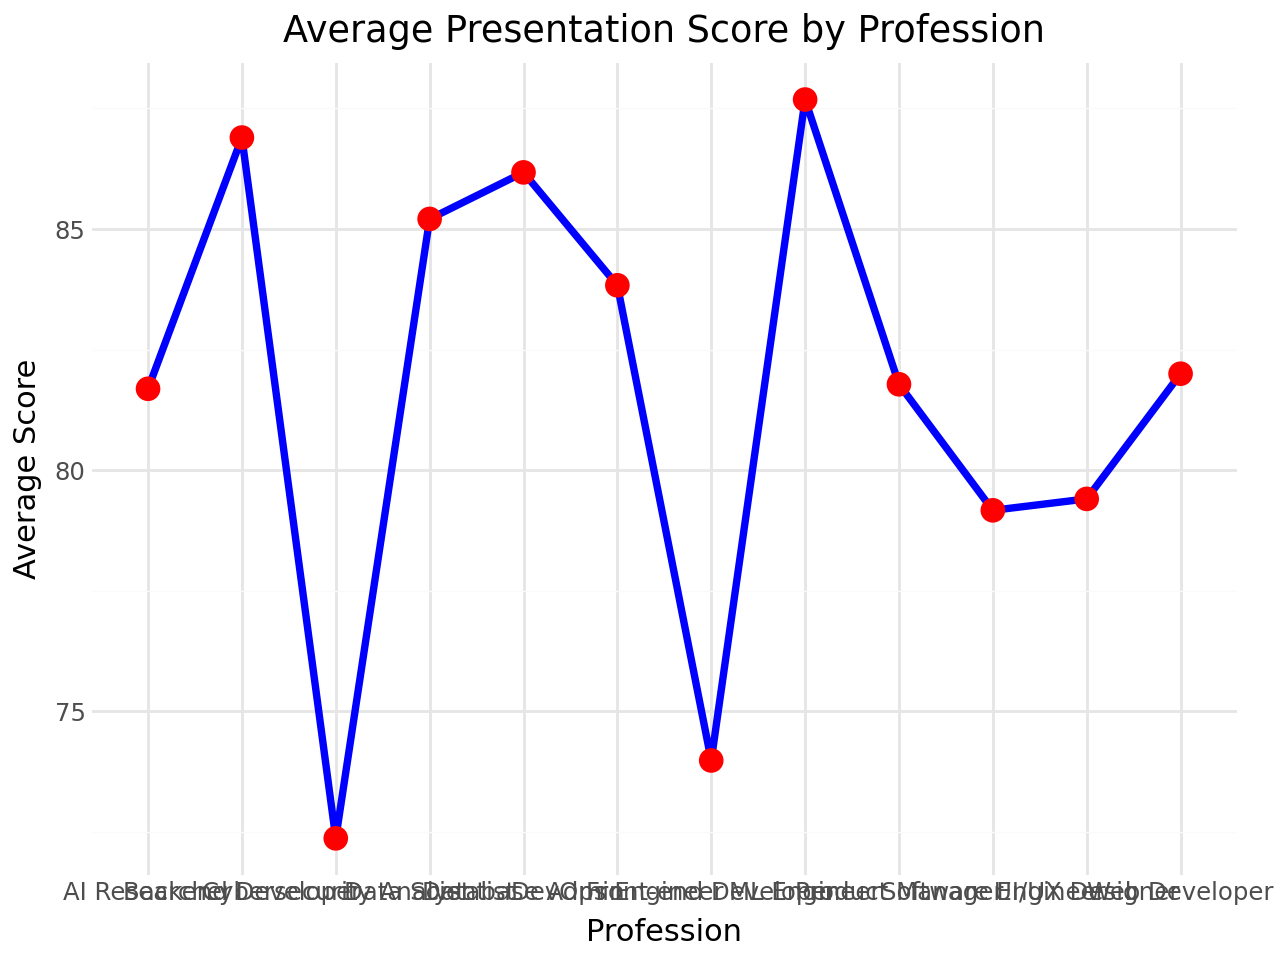

In [32]:
grouped = df.groupby('Profession')['Presentation_Score'].mean().reset_index()

plot = (
    ggplot(grouped, aes(x='Profession', y='Presentation_Score', group=1)) +
    geom_line(color='blue', size=1.5) +
    geom_point(color='red', size=4) +
    labs(title='Average Presentation Score by Profession', x='Profession', y='Average Score') +
    theme_minimal()
)

display(plot)


## Interactive Bar Chart — Participants Count by Profession.
Counts how many times each profession appears in the dataset<br>
Sorts professions alphabetically (or by index)<br>
Separates profession names and their counts into two lists for plotting<br>
Creates a Bokeh data source, which allows for dynamic, interactive plotting<br>
x_range=professions: Sets x-axis to profession names<br>
vbar(...): Draws vertical bars for each profession with height based on participant count<br>
### Showing.
Profession     	Count        	Meaning<br>
Developer	     150     	Most common profession in TechFest2025<br>
Designer        80	       Moderate participation<br>
Teacher	         50	         Smaller group<br>
"participants_count_by_profession.html" is the filename where the chart will be saved.<br>
output_file(...) is a function from Bokeh that sets the output destination for your plot.<br>
(These numbers are just examples—you should check the real output.)<br>

### Summary.
This interactive bar chart displays the number of participants from each profession at TechFest2025. It helps in identifying dominant professional backgrounds, which is crucial for content planning and effective session targeting.<br>

In [29]:
profession_counts = df['Profession'].value_counts().sort_index()
professions = list(profession_counts.index)
counts = list(profession_counts.values)

source = ColumnDataSource(data=dict(professions=professions, counts=counts))

fig = figure(x_range=professions, title="Participants Count by Profession", width=800, height=400)
fig.vbar(x='professions', top='counts', width=0.5, source=source)

output_file("participants_count_by_profession.html") #"Create a new HTML file called participants_count_by_profession.html and place my chart inside it." 


show(fig)

## Horizontal Bar Chart — Profession Count.
Counts how many participants belong to each profession<br>
Sorts the result alphabetically<br>
Extracts profession names and their counts as separate lists<br>
Prepares the data in Bokeh’s format so it can be plotted<br>
figure(...): Creates a horizontal canvas<br>
hbar(...): Draws horizontal bars where:<br>
y='profession': Each profession is on the vertical axis<br>
right='counts': Length of each bar is based on count<br>
height=0.5: Thickness of each bar<br>
### This Graph Shows.
Profession	     Count (example)        	Meaning<br>
Student         	120	                Most participants are students<br>
Engineer	         85              	Active professional involvement<br>
Researcher	         45	                 Niche but significant<br>

### Summary.
The horizontal bar chart visualizes participant distribution by profession. It improves readability, especially when profession names are long, and clearly highlights the most and least represented professions at TechFest2025. This helps in evaluating outreach success and optimizing future events.<br>

In [30]:
profession_counts = df['Profession'].value_counts().sort_index()
professions = list(profession_counts.index)
counts = list(profession_counts.values)

source = ColumnDataSource(data=dict(profession=professions, counts=counts))

p = figure(y_range=professions, title="Profession Count (Horizontal)", width=800, height=400)
p.hbar(y='profession', right='counts', height=0.5, source=source)

show(p)